In [1]:
import numpy as np

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [3]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Unnamed: 0 column is random and does not contribute in analysing price or region. Hence dropping the column.

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


EDA

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

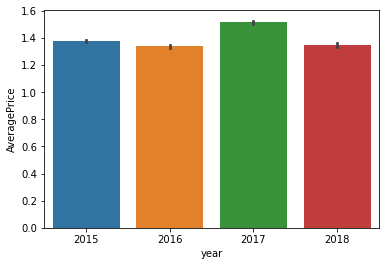

In [8]:
sns.barplot(x='year', y='AveragePrice',data=df)

We can observe Avocado prices were high in year 2017.

<AxesSubplot:xlabel='region', ylabel='AveragePrice'>

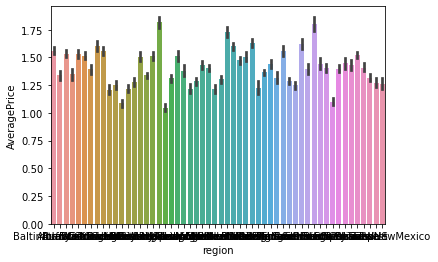

In [9]:
sns.barplot(x='region', y='AveragePrice',data=df)

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

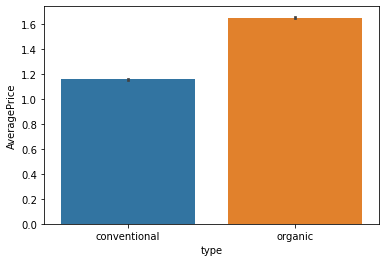

In [10]:
sns.barplot(x='type', y='AveragePrice',data=df)

Organic Avocados are more costlier than conventional.

<AxesSubplot:xlabel='region', ylabel='Total Volume'>

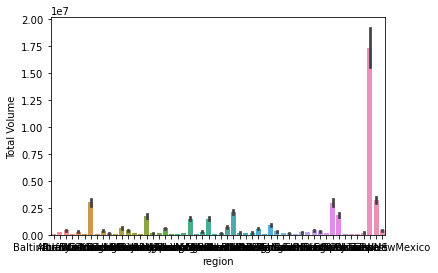

In [11]:
sns.barplot(x='region', y='Total Volume',data=df)

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

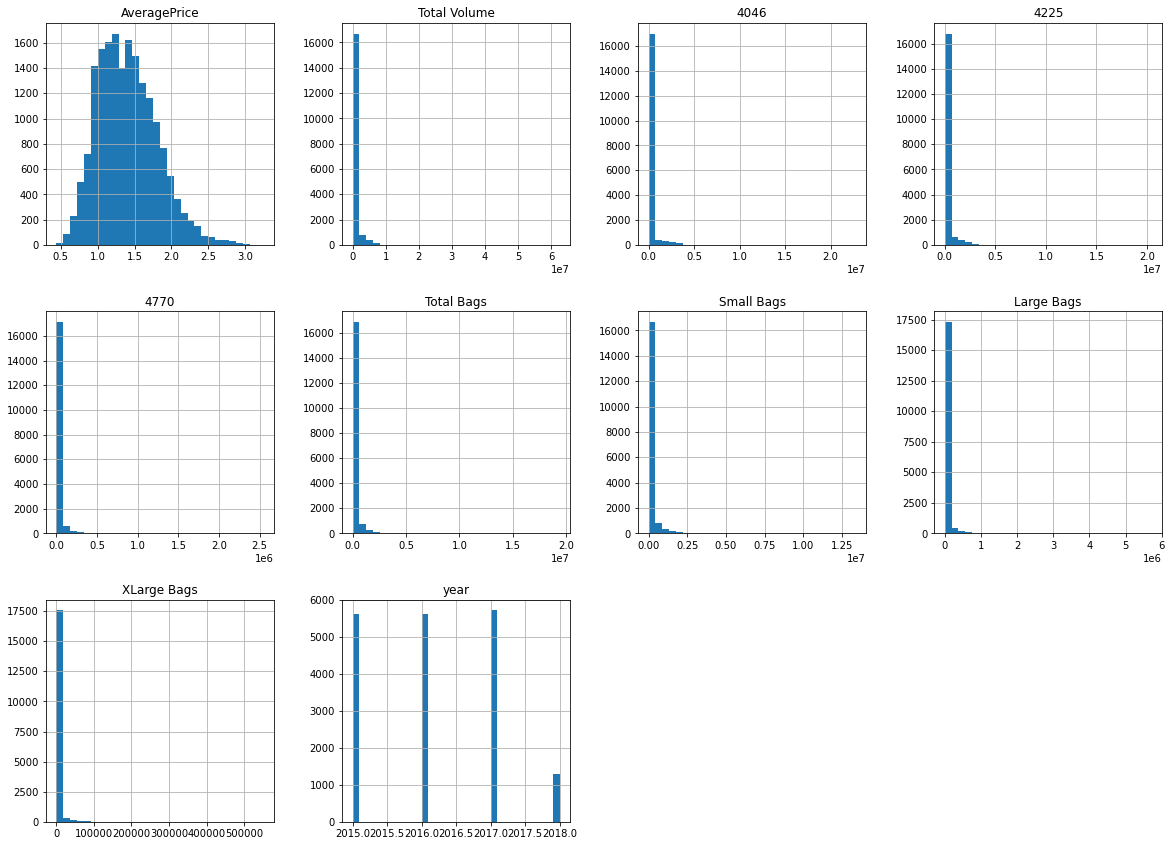

In [13]:
df.hist(figsize=(20,20), grid=True, layout=(4,4), bins=30)

Above graph indicates data is left skewed for many columns and average column has normal distribution. We will remove skewness in data cleaning step.

In [14]:
df.groupby('year')['Total Volume'].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [15]:
df.groupby('year')['AveragePrice'].sum()

year
2015    7723.94
2016    7517.80
2017    8669.56
2018    1746.40
Name: AveragePrice, dtype: float64

We can observe in year 2017 highest number of Avocados were sold and average price was highest in year 2017.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [17]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

From above steps we can observe:
1) There are no null values present in dataset.
2) There are few categorical columns

In [18]:
pd.get_dummies(df["year"]).sum()

2015    5615
2016    5616
2017    5722
2018    1296
dtype: int64

In [19]:
pd.get_dummies(df["region"]).sum()

Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
R

In [20]:
pd.get_dummies(df["type"]).sum()

conventional    9126
organic         9123
dtype: int64

LabelEncoder to convert categorical columns into numerical data type.

In [21]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [22]:
df["Date"]=le.fit_transform(df["Date"])
df["Date"].value_counts()

51     108
155    108
153    108
152    108
151    108
      ... 
96     108
157    108
128    107
129    107
48     107
Name: Date, Length: 169, dtype: int64

In [23]:
df["type"]=le.fit_transform(df["type"])
df["type"].value_counts()

0    9126
1    9123
Name: type, dtype: int64

In [24]:
df["region"]=le.fit_transform(df["region"])
df["region"].value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

In [25]:
df.describe()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,83.997096,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,48.787638,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,42.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,84.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,126.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,168.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


Key Observations:
    1) Data seems to have skewness.
    2) for few columns mean is almost equal to the 50% value which shows normal distribution.
    3) For few columns the gap between 75% and max value is igh which indicates possibility of outliers.

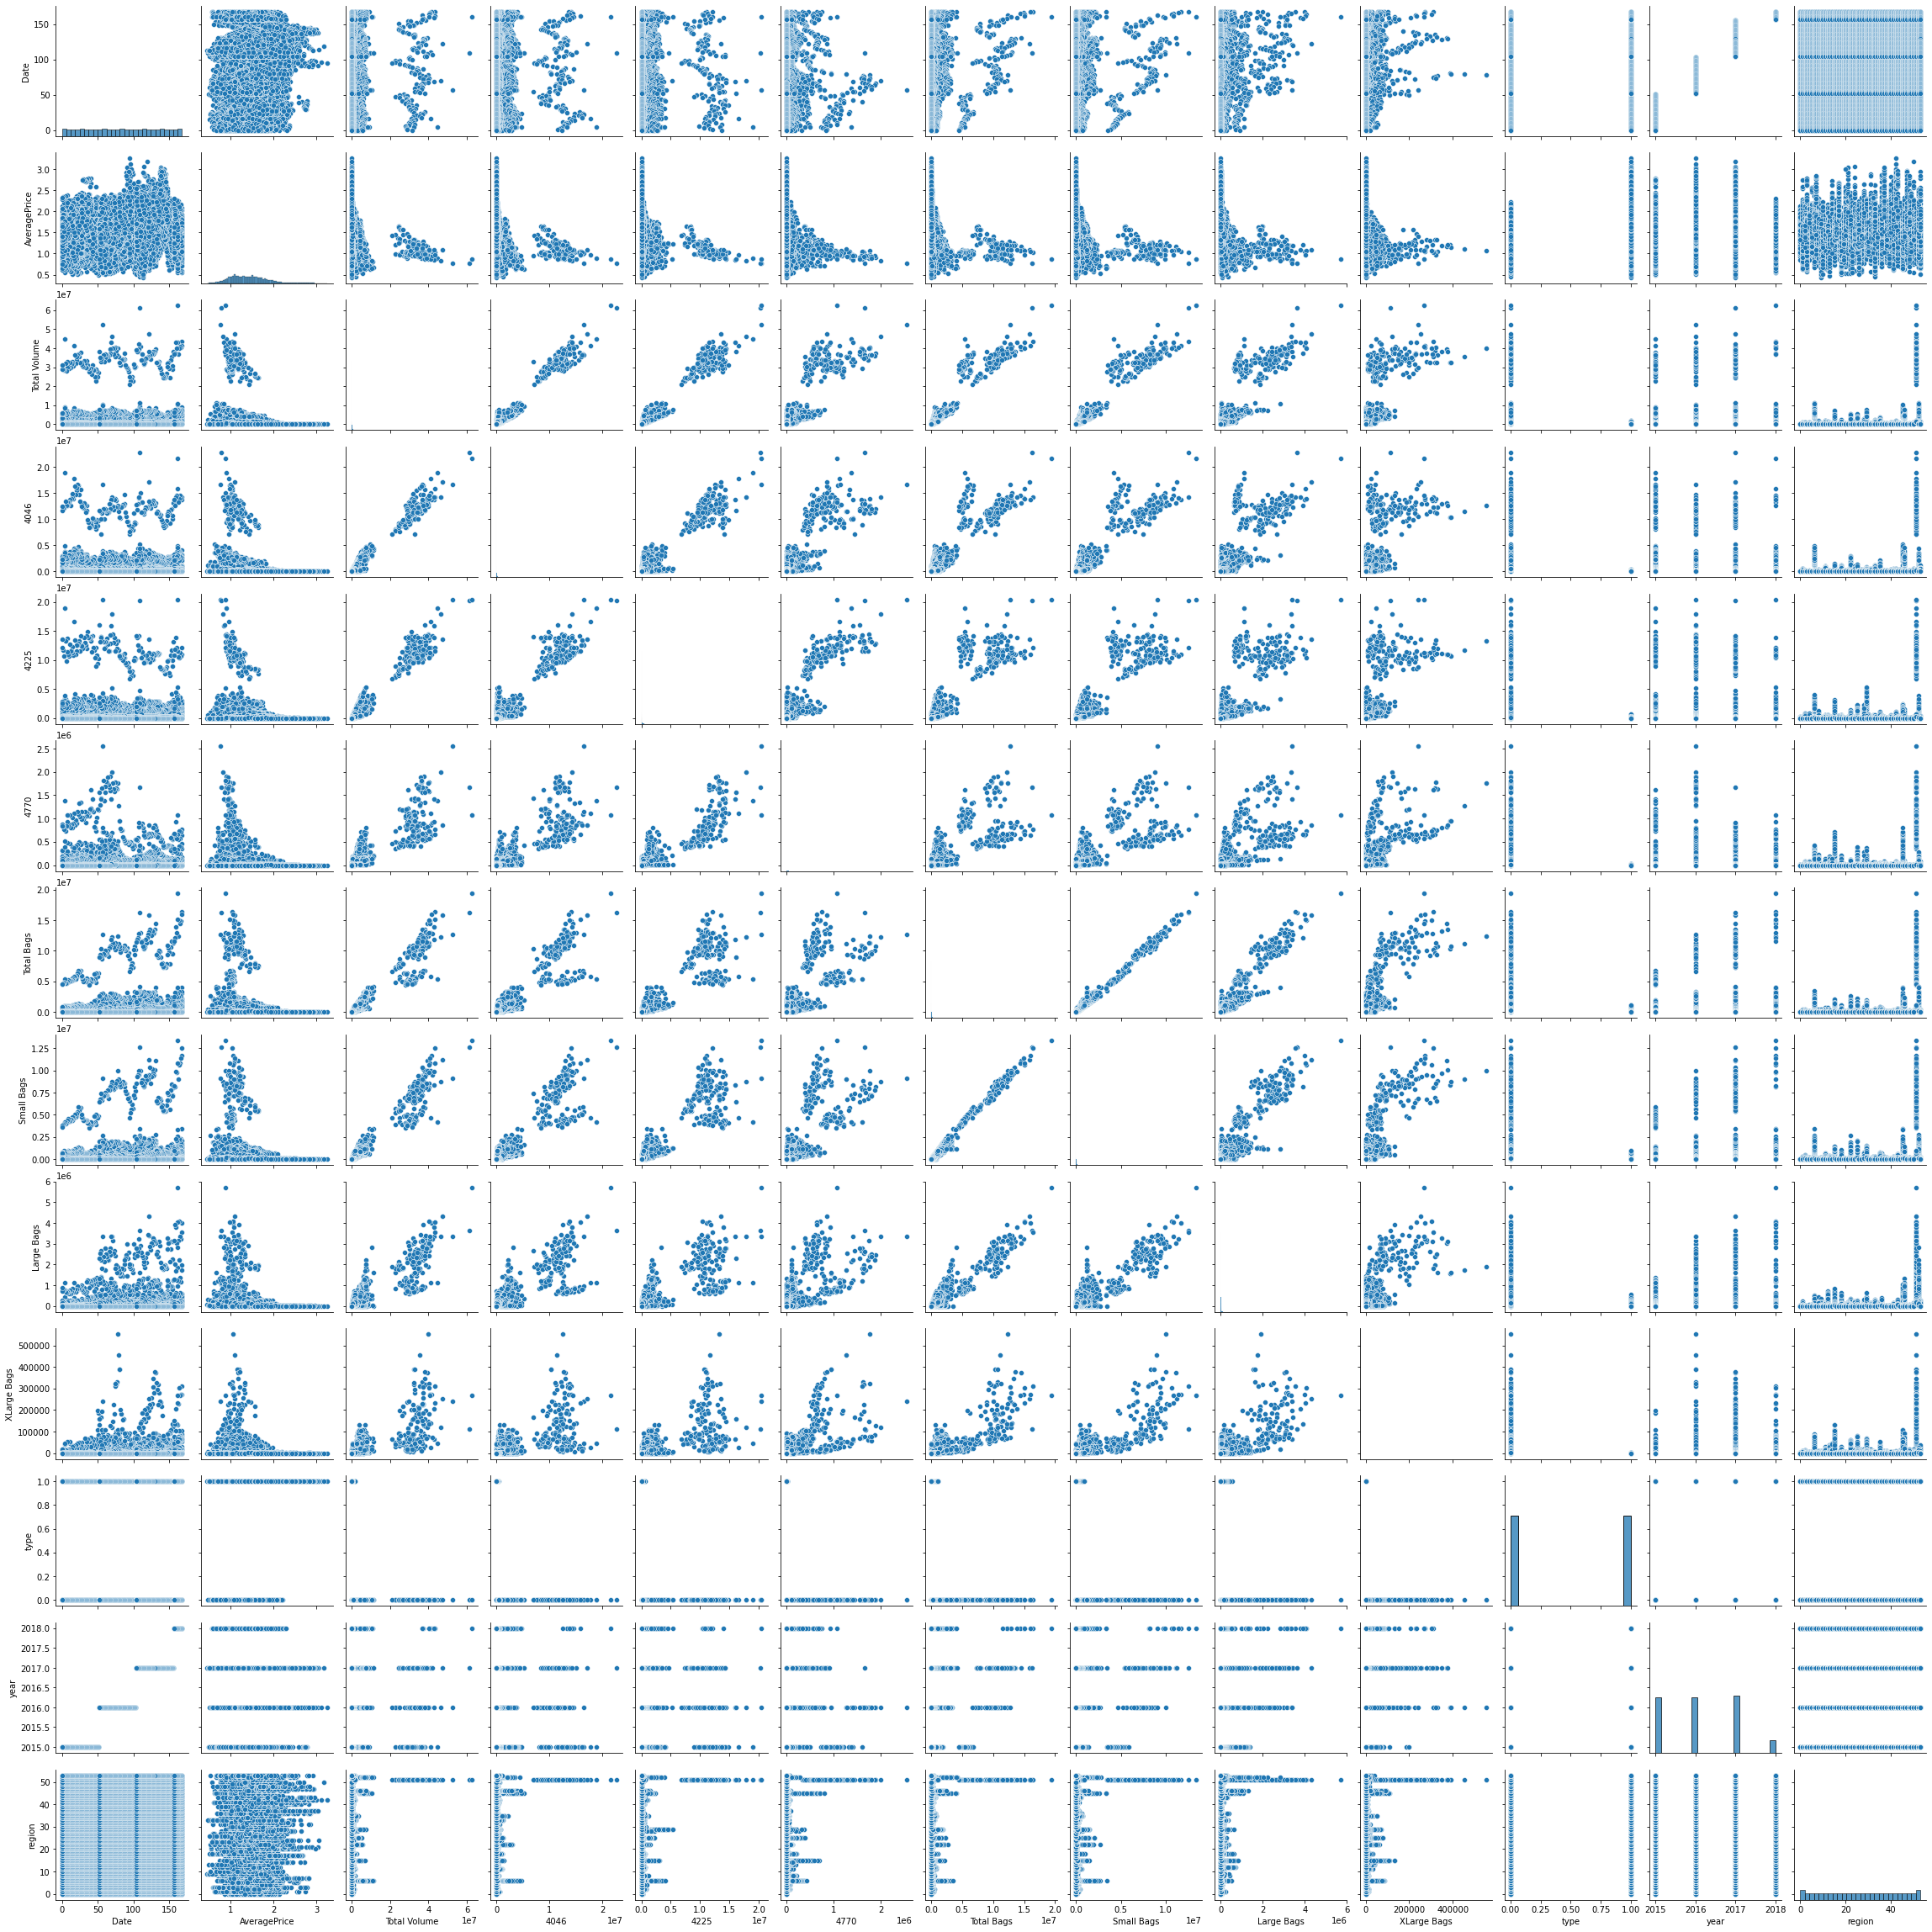

In [26]:
sns.pairplot(df)

Checking correlation

In [27]:
dfcor = df.corr()
dfcor

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,1.000000,0.145514,0.009263,-0.005028,-0.016895,-0.047517,0.064688,0.056902,0.081855,0.077374,-0.000060,0.950274,-0.000101
AveragePrice,0.145514,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.009263,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,-0.005028,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,-0.016895,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,-0.047517,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,0.064688,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.056902,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,0.081855,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,0.077374,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


<AxesSubplot:>

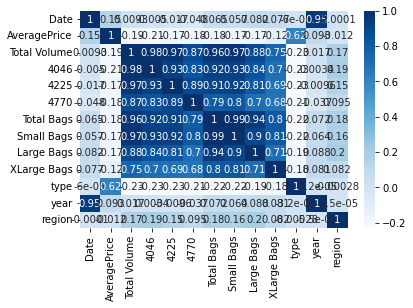

In [28]:
sns.heatmap(df.corr(),cmap="Blues",annot=True)

By observing above correlation:
    1) Average price is highly positively correlated with columns Type,region and year and it is highly negatively ccorrelated with other columns.
    2) Region is negatively correlated with year,type,date and average price. highly positively related with rest of the columns.
   
We will not drop any column because of correlation.

Checking multicollinearity

In [29]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)
X_scaled

array([[-0.67635986, -0.22771641, -0.23081597, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.69685742, -0.23042664, -0.23110251, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       [-0.71735497, -0.21208462, -0.23100731, ..., -0.99983562,
        -1.22128204, -1.7002522 ],
       ...,
       [ 1.53737632, -0.24233073, -0.2306933 , ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.51687877, -0.24162464, -0.2304279 , ...,  1.00016441,
         1.97050371,  1.70081131],
       [ 1.49638121, -0.24125273, -0.22934712, ...,  1.00016441,
         1.97050371,  1.70081131]])

In [31]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = x.columns

vif

,vif,Features
0,1.035983e+01,Date
1,4.926438e+09,Total Volume
2,6.609567e+08,4046
3,5.988813e+08,4225
4,4.770240e+06,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.450435e+13,Large Bags
8,7.622368e+10,XLarge Bags
9,1.061747e+00,type


We will not drop any column after checking multicollinearity

Checking Skewness

In [32]:
df.skew()

Date             0.000117
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

In [34]:
columns = ('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')

for col in columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [35]:
df.skew()

Date            0.000117
AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     0.840536
type            0.000329
year            0.215339
region          0.000030
dtype: float64

We can observe skewness has been reduced and lies in rage between 0.00001 to 0.84

Checking outliers

<AxesSubplot:>

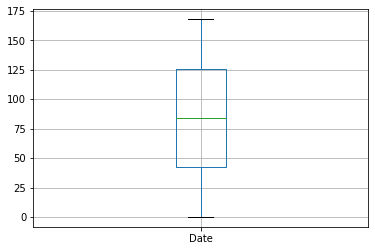

In [36]:
df.boxplot('Date')

<AxesSubplot:>

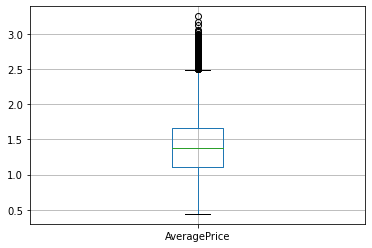

In [37]:
df.boxplot('AveragePrice')

<AxesSubplot:>

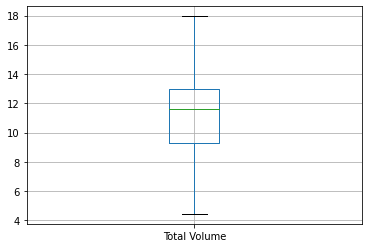

In [38]:
df.boxplot('Total Volume')

<AxesSubplot:>

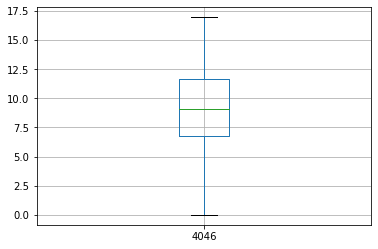

In [39]:
df.boxplot('4046')

<AxesSubplot:>

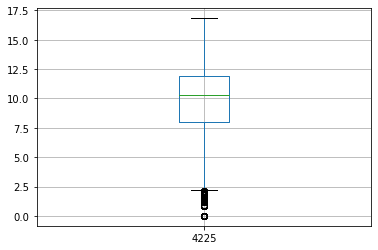

In [40]:
df.boxplot('4225')

<AxesSubplot:>

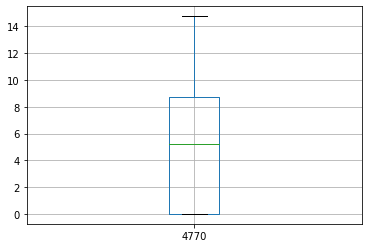

In [41]:
df.boxplot('4770')

<AxesSubplot:>

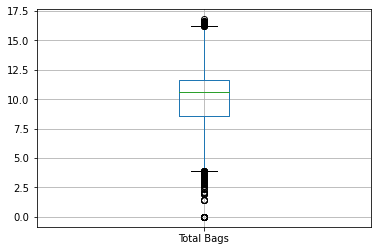

In [42]:
df.boxplot('Total Bags')

<AxesSubplot:>

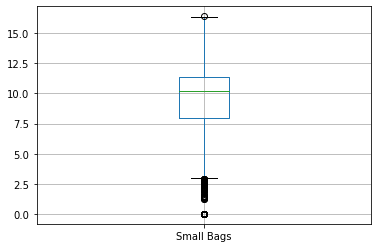

In [43]:
df.boxplot('Small Bags')

<AxesSubplot:>

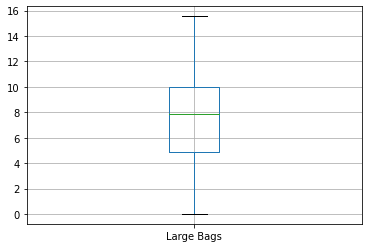

In [44]:
df.boxplot('Large Bags')

<AxesSubplot:>

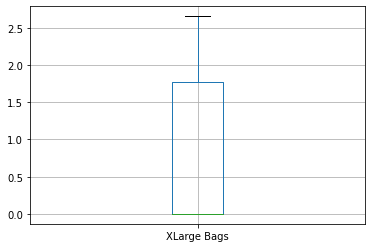

In [45]:
df.boxplot('XLarge Bags')

<AxesSubplot:>

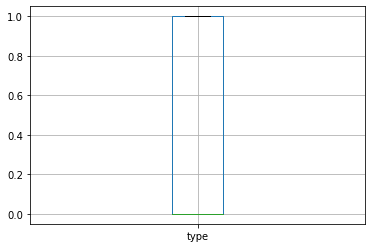

In [46]:
df.boxplot('type')

<AxesSubplot:>

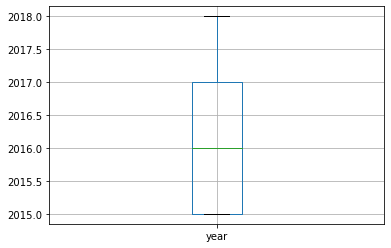

In [47]:
df.boxplot('year')

<AxesSubplot:>

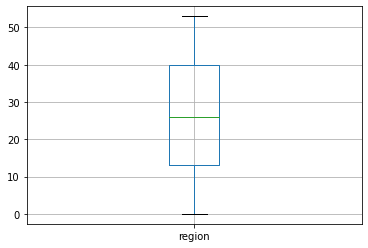

In [48]:
df.boxplot('region')

I will drop Date column as it is not contributing much to target and we have year column we can consider for futher steps related to date aspect.

In [49]:
df.drop('Date',axis=1,inplace=True)

We can observe outliers are present hence we will remove the outliers now.

In [50]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 9189,  9190,  9191,  9192,  9192,  9203,  9204,  9205,  9206,
         9211,  9212,  9212,  9213,  9218,  9219,  9220,  9221,  9293,
         9294,  9298,  9668,  9894,  9894, 10154, 10232, 10234, 10324,
        10325, 10326, 10327, 10331, 10332, 10333, 10334, 10334, 10375,
        10377, 10380, 10382, 10388, 10392, 10397, 10398, 10417, 10419,
        10420, 10531, 10532, 10533, 10534, 10535, 10536, 10562, 10563,
        10566, 11011, 11012, 11014, 11015, 11016, 11017, 11018, 11019,
        11020, 11021, 11022, 11023, 11024, 11024, 11025, 11026, 11027,
        11028, 11029, 11030, 11031, 11032, 11033, 11034, 11035, 11036,
        11037, 11039, 11040, 11041, 11042, 11314, 11316, 11318, 11319,
        11320, 11320, 11320, 11321, 11321, 11321, 11322, 11323, 11324,
        11324, 11325, 11325, 11325, 11326, 11326, 11327, 11327, 11328,
        11329, 11329, 11330, 11330, 11331, 11331, 11332, 11332, 11333,
        11333, 11334, 11335, 11336, 11337, 11338, 11338, 11339, 11340,
      

In [51]:
df = df[(z<3).all(axis=1)]
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,2015,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,2015,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,2015,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,2015,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,9.745419,7.624599,7.333154,0.000000,9.510421,9.477908,6.070391,0.0,1,2018,53
18245,1.71,9.538855,7.083975,8.141044,0.000000,9.134090,9.098407,5.786284,0.0,1,2018,53
18246,1.87,9.530085,7.084159,7.805389,6.591591,9.147945,9.143431,3.768384,0.0,1,2018,53
18247,1.93,9.693150,7.332127,8.000363,6.590315,9.302969,9.298401,3.931826,0.0,1,2018,53


In [52]:
df.shape

(17840, 12)

%Percentage data loss

In [53]:
Data_loss=((18249-17840)/18249)*100
Data_loss

2.2412186969148995

Regression Task

In [54]:
model = [DecisionTreeRegressor(),KNeighborsRegressor(),LinearRegression(),SVR()]

for i in range(0,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x_train,y_train)
        prediction = models.predict(x_test)
        R2Score = r2_score(y_test,prediction)
        print("R2 score for random state: ", i, " is ",R2Score)
print()
print()
print()
print()

R2 score for random state:  0  is  0.7716548792347513
R2 score for random state:  0  is  0.636910099996457
R2 score for random state:  0  is  0.43348382256417983
R2 score for random state:  0  is  0.343807845020044
R2 score for random state:  1  is  0.7715306654523169
R2 score for random state:  1  is  0.6510874797438394
R2 score for random state:  1  is  0.43168420789452266
R2 score for random state:  1  is  0.35846613824991436
R2 score for random state:  2  is  0.7755611648467744
R2 score for random state:  2  is  0.6393758313983662
R2 score for random state:  2  is  0.4321028585503961
R2 score for random state:  2  is  0.34047777609717933
R2 score for random state:  3  is  0.7848093412982914
R2 score for random state:  3  is  0.6565032971725517
R2 score for random state:  3  is  0.4425327431606272
R2 score for random state:  3  is  0.35292336398910673
R2 score for random state:  4  is  0.7722966024106144
R2 score for random state:  4  is  0.6374768739558195
R2 score for random state

We can observe the highest R2 Score:0.7979569702801451 is at random state 24 and for model: DecisionTreeRegressor.

Best Parameter

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=24)
dtr = DecisionTreeRegressor()
parameters={'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2']}
gridsearch =GridSearchCV(dtr,parameters)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [84]:
dtr.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [63]:
DecTree = DecisionTreeRegressor(criterion='mse',max_features='auto')
DecTree.fit(x_train,y_train)
predictions = DecTree.predict(x_test)
r2Score = r2_score(y_test,predictions)
print("R2 Score is: ",r2Score)

R2 Score is:  0.7958276113776661


Regression Metrics

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: ", mean_absolute_error(y_test,predictions))
print("Mean Squared Error: ",mean_squared_error(y_test,predictions))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,predictions)))

Mean Absolute Error:  0.11928773036692676
Mean Squared Error:  0.033407521168852726
Root Mean Squared Error:  0.1827772446691675


Classification Task

In [68]:
x1 = df.drop(['region'],axis=1)
y1 = df['region']

In [69]:
x1.shape

(17840, 11)

In [70]:
y1.shape

(17840,)

In [71]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(x1)
X1_scaled

array([[-0.16002661, -0.13325384, -0.62776676, ..., -0.70499014,
        -0.97716645, -1.22978212],
       [-0.10826848, -0.20231191, -0.75576338, ..., -0.70499014,
        -0.97716645, -1.22978212],
       [-1.1951891 ,  0.13423468, -0.70688068, ..., -0.70499014,
        -0.97716645, -1.22978212],
       ...,
       [ 1.23744276, -0.80870127, -0.58625275, ..., -0.70499014,
         1.02336711,  1.96108127],
       [ 1.39271714, -0.73719243, -0.51238487, ..., -0.70499014,
         1.02336711,  1.96108127],
       [ 0.5904662 , -0.70374704, -0.32206726, ..., -0.70499014,
         1.02336711,  1.96108127]])

In [72]:
#from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
model = [DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]

for i in range(0,50):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.33,random_state=i)
    for models in model:
        models.fit(x1_train,y1_train)
        prediction = models.predict(x1_test)
        accu_Score = accuracy_score(y1_test,prediction)
        print("Accuracy score for random state: ", i, " is ",accu_Score)
print()
print()
print()
print()

Accuracy score for random state:  0  is  0.7870244565217391
Accuracy score for random state:  0  is  0.016644021739130436
Accuracy score for random state:  0  is  0.9006453804347826
Accuracy score for random state:  0  is  0.8564877717391305
Accuracy score for random state:  1  is  0.799422554347826
Accuracy score for random state:  1  is  0.030400815217391304
Accuracy score for random state:  1  is  0.8999660326086957
Accuracy score for random state:  1  is  0.8610733695652174
Accuracy score for random state:  2  is  0.7895720108695652
Accuracy score for random state:  2  is  0.016134510869565216
Accuracy score for random state:  2  is  0.8991168478260869
Accuracy score for random state:  2  is  0.8597146739130435
Accuracy score for random state:  3  is  0.78515625
Accuracy score for random state:  3  is  0.01579483695652174
Accuracy score for random state:  3  is  0.9059103260869565
Accuracy score for random state:  3  is  0.8600543478260869
Accuracy score for random state:  4  is  0

We can observe the highest accuracy Score:0.9067595108695652 is at random state 40 and for model: RandomForestClassifier.

Best Parameter

In [81]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.33,random_state=40)
rfc = RandomForestClassifier()
parameters={'max_features': ['auto','sqrt','log2']}
gridsearch =GridSearchCV(rfc,parameters)
gridsearch.fit(x1_train,y1_train)
gridsearch.best_params_

{'max_features': 'sqrt'}

In [75]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [82]:
Rfc = RandomForestClassifier(max_features='sqrt')
Rfc.fit(x1_train,y1_train)
predictions = Rfc.predict(x1_test)
AccScore = accuracy_score(y1_test,predictions)
print("Accuracy Score is: ",AccScore)

Accuracy Score is:  0.9031929347826086


Accuracy score is 90% with RandomForestClassifier

In [85]:
score = cross_val_score(Rfc,x1,y1,cv=5)

In [86]:
print("Croos Val Score: ",score)
print("Mean Score: ",score.mean())
print("std Score: ",score.std())

Croos Val Score:  [0.63705157 0.82034753 0.77130045 0.68553812 0.4963565 ]
Mean Score:  0.6821188340807175
std Score:  0.11279266596452531
